# Flow of an MLP

1. Input features (numbers, pixels, etc) feed into a layer of neurons.
2. Each neuron weights its inputs and applies an activation function.
3. Neurons pass signals forward - layer by layer - each learning more abstract patterns.
4. Output layer gives a prediction (e.g. class label, number).

| Term | Meaning |
|------|---------|
| Neuron | Weighted sum + activation |
| Layer | A group of neurons doing this in parallel |
| Hidden Layer | Helps learn features (like edges or shapes) |
| Activation function | Adds non-linearity (e.g. ReLU (Retified Linear Unit), Sigmoid) |
| Backpropagation | Adjusts weights based no error |



              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.95      1.00      0.97        37
           2       0.97      0.97      0.97        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.95      0.97      0.96        59
           6       0.98      0.96      0.97        45
           7       1.00      0.98      0.99        41
           8       0.92      0.89      0.91        38
           9       0.96      0.96      0.96        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



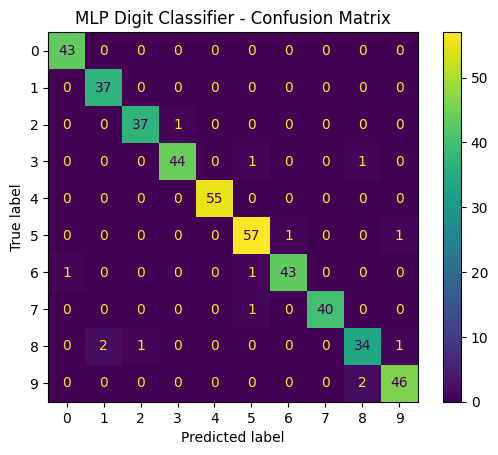

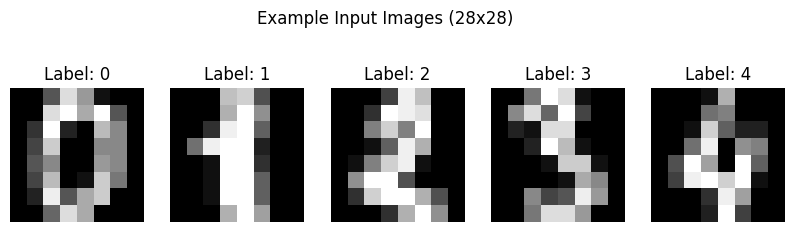

In [4]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and train MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=300,
    random_state=42
)
mlp.fit(X_train, y_train)

# Predict and evulate
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("MLP Digit Classifier - Confusion Matrix")
plt.show()

# Show example digits
fig, ax = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    ax[i].imshow(digits.images[i], cmap='gray')
    ax[i].set_title(f"Label: {digits.target[i]}")
    ax[i].axis('off')
plt.suptitle("Example Input Images (28x28)")
plt.show()